# 학습 목표
- 중복된 데이터를 찾아 제거할 수 있고, 결측치(missing data)를 제거하거나 채워 넣을 수 있다.
- 데이터를 정규화시킬 수 있다.
- 이상치(outlier)를 찾고, 이를 처리할 수 있다.
- 범주형 데이터를 원-핫 인코딩할 수 있다.
- 연속적인 데이터를 구간으로 나눠 범주형 데이터로 변환할 수 있다.  
  
# 배울 내용
1. 결측치(Missing Data)
2. 중복된 데이터
3. 이상치(Outlier)
4. 정규화(Normalization)
5. 원-핫 인코딩(One-Hot Encoding)
6. 구간화(Binning)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_file_path = os.getenv('HOME')+'/aiffel/data_preprocess/data/trade.csv'
trade = pd.read_csv(csv_file_path)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


<br><br><br><br><br><br>

# 결측치 Missing Data
- 결측치가 있는 데이터를 제거한다.
- 결측치를 어떤 값으로 대체한다.
  - 결측치를 대체하는 방법은 다양한데 데이터마다 특성을 반영하여 해결해야 한다.

In [4]:
# 컬럼별 결측치 개수
len(trade) - trade.count()

기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

기타사항을 보면 전부 결측치라는 걸 알 수 있다. 아무런 정보가 없기 때문에 삭제.

In [5]:
trade = trade.drop('기타사항', axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


## DataFrame.isnull()
데이터마다 결측치 여부를 True, False로 반환
## DataFrame.any(axis=1)
행마다 하나라도 True가 있으면 True, 그렇지 않으면 False를 반환

In [6]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


index 191 데이터는 삭제하기보다 특정 값으로 대체  
index 196, 197, 198은 제거

## dropna()
결측치 삭제  
- subset : 특정 컬럼들 선택
- how
  - all : 선택한 컬럼 전부가 결측치인 행을 삭제
  - any : 하나라도 결측치인 경우
- inplace : 해당 DataFrame 내부에 바로 적용(boolean)

In [9]:
# index 196, 197, 198 제거
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN


index 191 데이터는 삭제하기보다 특정 값으로 대체  
1. 특정값 지정 : 결측치가 많을 때 모두 같은 값으로 대체한다면 데이터의 분산이 실제보다 작아질 수 있다.
2. 평균, 중앙값으로 대체 : 결측치가 많을 때 데이터의 분산이 실제보다 작아지는 문제 발생
3. 다른 데이터를 이용해 예측값으로 대체 : 예를들어 머신러닝모델로 2020년 4월 미국의 예측값을 만들어 결측치 보완
4. 시계열특성의 데이터의 경우 앞뒤 데이터를 통해 결측치 대체 : 예를 들어 기온데이터의 결측치 경우 전후 데이터의 평균으로 보완

In [10]:
trade.loc[[188, 191, 194]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [13]:
# 수출금액 - 이전 달과 다음 달의 평균
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액'] )/2
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,NaN


In [14]:
# 무역수지 - 수출금액-수입금액
trade.loc[191, '무역수지'] = trade.loc[191, '수출금액'] - trade.loc[191, '수입금액'] 
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0


## 데이터가 범주형일 경우
1. 특정값 지정  
예를 들어 ‘기타’, ‘결측’과 같이 새로운 범주를 만들어 결측치를 채울 수 있다.  

2. 최빈값  
결측치가 많은 경우 최빈값이 지나치게 많아질 수 있으므로 결측치가 많을 때는 다른 방법을 사용  

3. 다른 데이터를 이용해 예측값  

4. 시계열 특성 데이터라면 앞뒤데이터를 통해 대체.   
예를 들어 특정인의 2019년 직업이 결측치이고, 2018년과 2020년 직업이 일치한다면 그 값으로 보완할 수 있습니다. 만약 다르다면 둘 중 하나로 보완

<br><br><br><br><br><br>

# 중복된 데이터

## DataFrame.duplicated()
중복된 데이터 여부를 불리언 값으로 반환

In [16]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [17]:
trade[(trade['기간']=='2020년 03월')&(trade['국가명']=='중국')]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


## DataFrame.drop_duplicates(inplace=True)
중복된 데이터 삭제
[참고](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)  
- subset : 어떤 컬럼에서 중복을 체크할 것인가.(default-모든 컬럼)
- keep : 중복된 데이터에서 무엇을 남길 것인가(default-first, last)
- inplace : DF에 바로 적용할 것인지 여부(default-False)

In [20]:
trade.drop_duplicates(inplace=True)

In [21]:
trade[(trade['기간']=='2020년 03월')&(trade['국가명']=='중국')]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


<br><br><br><br><br><br>

# 이상치 Outlier
**대부분 값의 범위에서 벗어나 극단적으로 크거나 작은 값**

이상치를 판단한 후에는?
- 이상치 삭제(이상치끼리 따로 분석할 수도 있다)
- 다른 값으로 대체
- 예측값 활용
- binning을 통해 수치형 데이터를 범주형으로 바꿈

## 1. 평균과 표준편차 이용 - z-score
평균을 빼주고 표준편차로 나눠 z score를 계산한 후, z score가 특정 기준을 넘어서는 데이터에 대해 이상치라고 판단

In [25]:
# 이상치인 데이터의 인덱스를 리턴
# input : 데이터프레임 df, 컬럼 col, 기준 z
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index
# abs(df[col] - np.mean(df[col])) : 데이터에서 평균을 빼준 것에 절대값을 취합니다.
# abs(df[col] - np.mean(df[col]))/np.std(df[col]) : 위에 한 작업에 표준편차로 나눠줍니다.
# df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index: 값이 z보다 큰 데이터의 인덱스를 추출합니다.

In [26]:
trade.loc[outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0
75,2017년 02월,중국,159062.0,11118131.0,188555.0,6600637.0,4517495.0
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
99,2017년 10월,중국,137873.0,12580474.0,244977.0,7932403.0,4648071.0
101,2017년 10월,일본,63510.0,1847999.0,127696.0,4418583.0,-2570584.0
102,2017년 11월,중국,421194.0,14000887.0,307790.0,9253318.0,4747569.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0
116,2018년 03월,일본,80142.0,2603450.0,159601.0,5226141.0,-2622691.0


In [27]:
trade.loc[outlier(trade, '무역수지', 2)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0


In [28]:
trade.loc[outlier(trade, '무역수지', 3)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


In [29]:
# 이상치 값이 아닌 데이터 추출
def not_outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col]) <= z].index

In [30]:
trade.loc[not_outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


## IQR method
**사분위범위수 IQR(Interquartile range)**로 이상치 추출  
[참고](https://m.blog.naver.com/PostView.nhn?blogId=sw4r&logNo=221021173204&proxyReferer=https:%2F%2Fwww.google.com%2F)

In [32]:
# ex
np.random.seed(2020)
data = np.random.randn(100)  # 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate((data, np.array([8, 10, -3, -5])))      # [8, 10, -3, -5])를 데이터 뒤에 추가함

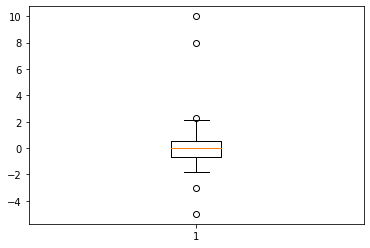

In [33]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

In [35]:
# IQR을 구하기 위해 우선 제1사분위수와 제 3사분위수를 구한다.
Q3, Q1 = np.percentile(data, [75 ,25])
print(Q3, Q1)
IQR = Q3 - Q1
print(IQR)

0.5166477538712722 -0.6478448291078243
1.1644925829790964


In [36]:
# IQR과 제 1사분위수, 제 3사분위수를 이용하여 이상치를 확인
data[(Q1-1.5*IQR > data)|(Q3+1.5*IQR < data)]

array([ 2.31256634,  8.        , 10.        , -3.        , -5.        ])

In [37]:
def outlier2(df, col):
    Q3, Q1 = np.percentile(df[col], [75,25])
    IQR = Q3 - Q1
    return df[(Q1 - 1.5 * IQR > df[col]) | (Q3 +1.5 * IQR < df[col]) ]

In [38]:
outlier2(trade, '무역수지')

2745131.0 -1620432.0


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


<br><br><br><br><br>

# 정규화 Normalization
컬럼간에 범위가 다를 경우 데이터를 정규화한다.
[참고동영상](https://www.youtube.com/watch?v=FDCfw-YqWTE&feature=youtu.be)

In [50]:
# test
np.random.seed(2020)
x = pd.DataFrame({
    'A': np.random.randn(100)*4 + 4,
    'B': np.random.randn(100) - 1
})
x

,A,B
0,-3.075383,-0.448552
1,4.302209,-2.151012
2,-0.522519,-1.245304
3,1.394279,-1.169169
4,0.427537,-0.458080
...,...,...
95,13.250265,-0.734271
96,0.137697,-2.041710
97,2.614901,-3.057545
98,7.866735,-2.140529


## 표준화 Standardization
데이터의 평균은 0, 분산은 1로 변환

In [44]:
x_standardization = (x - x.mean())/x.std()
x_standardization

,A,B
0,-1.862058,0.559307
1,0.072383,-1.132240
2,-1.192684,-0.232338
3,-0.690090,-0.156691
4,-0.943575,0.549839
...,...,...
95,2.418607,0.275419
96,-1.019573,-1.023639
97,-0.370038,-2.032961
98,1.007019,-1.121824


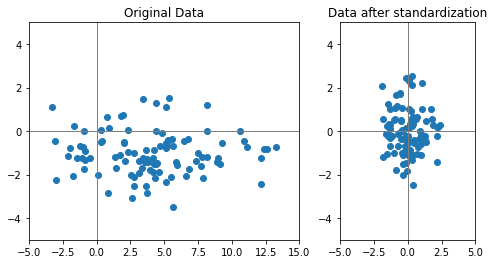

In [48]:
fig, axs = plt.subplots(1,2, figsize=(8, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

## Min-Max Scaling
데이터의 최솟값은 0, 최댓값은 1로 변환

In [45]:
x_min_max = (x-x.min())/(x.max()-x.min())
x_min_max

,A,B
0,0.012283,0.607216
1,0.458634,0.267692
2,0.166733,0.448318
3,0.282702,0.463502
4,0.224213,0.605316
...,...,...
95,1.000000,0.550235
96,0.206677,0.289490
97,0.356550,0.086901
98,0.674291,0.269782


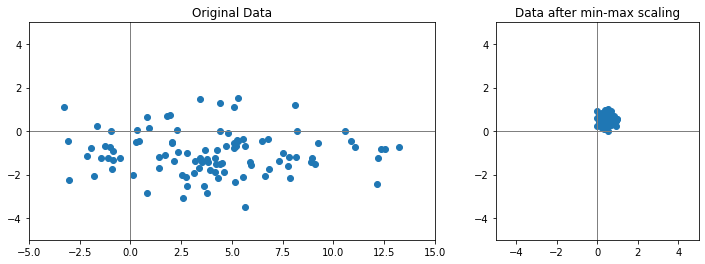

In [49]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()

In [51]:
# Standardization - trade 데이터 
# (컬럼데이터 - 컬럼데이터평균) / 컬럼표준편차
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
trade_Standardization= (trade[cols]-trade[cols].mean())/trade[cols].std()
trade_Standardization.head()

,수출건수,수출금액,수입건수,수입금액,무역수지
0,-0.007488,1.398931,-0.163593,1.283660,1.256342
1,-0.689278,-0.252848,0.412529,-0.964444,0.401088
2,-0.847838,-1.091156,-0.993148,-0.863844,-1.097779
3,-0.417598,0.852853,-0.576399,0.705292,0.832209
4,-0.764918,-0.389673,0.146306,-1.276341,0.438027


In [53]:
trade_Standardization.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.019128e-16,5.921189e-17,6.091993e-17,-8.312439e-17,3.074464e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.194976e-01,-1.231761e+00,-9.984408e-01,-1.276341e+00,-1.603764e+00
25%,-5.937426e-01,-1.041338e+00,-7.673625e-01,-7.911669e-01,-1.116765e+00
50%,-4.373265e-01,-1.564700e-01,-3.429346e-01,-4.137392e-01,1.426824e-01
75%,4.420459e-01,1.037200e+00,3.927781e-01,8.827841e-01,7.461637e-01
max,5.486317e+00,2.078416e+00,3.239068e+00,2.376092e+00,2.434109e+00


In [52]:
# Min-Max Scaling
# 데이터에서 최솟값을 빼주고, '최댓값-최솟값'으로 나눠준다.
trade[cols] = (trade[cols] - trade[cols].min()) / (trade[cols].max()-trade[cols].min())
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660


In [54]:
trade.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.143541,0.372113,0.235620,0.349450,0.397180
std,0.156108,0.302099,0.235988,0.273790,0.247655
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050853,0.057527,0.054532,0.132836,0.120608
50%,0.075271,0.324844,0.154691,0.236172,0.432516
75%,0.212548,0.685450,0.328311,0.591147,0.581972
max,1.000000,1.000000,1.000000,1.000000,1.000000


## scikit-learn의 standardscaler, minmaxscaler

In [56]:
from sklearn.preprocessing import MinMaxScaler
train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]
scaler = MinMaxScaler()
scaler.fit_transform(train)
scaler.transform(test)

array([[-0.25,  0.55]])

<br><br><br><br><br>

# 원-핫 인코딩 One-Hot Encoding
카테고리별 이진 특성을 만들어 해당하는 특성만 1, 나머지는 0으로 만드는 방법  
`get_dummies()` : [참고 사이트](https://devuna.tistory.com/67)

In [58]:
#trade 데이터의 국가명 컬럼 원본
print(trade['국가명'].head())  

# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country.head()

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


,미국,일본,중국
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


In [59]:
# pd.concat 함수로 데이터프레임 trade와 country를 합쳐준다.
trade = pd.concat([trade, country], axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0


In [60]:
# 필요없어진 국가명 컬럼 삭제
trade.drop(['국가명'], axis=1, inplace=True)
trade.head()

,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1
1,2015년 01월,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0
2,2015년 01월,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0
3,2015년 02월,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1
4,2015년 02월,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0


<br><br><br><br><br>

# 구간화 Binning
**데이터를 구간별로 나누는 기법(Data binning, bucketing)**  
- 히스토그램 같이 연속적인 데이터를 구간을 나눠 분석할 때 사용

In [63]:
# salary = 소득 데이터
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])

<AxesSubplot:>

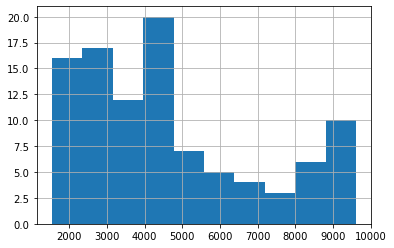

In [64]:
# salary를 구간을 나눠봄
salary.hist()

## pd.cut(data, bins)
cut(데이터, 구간) 을 이용해 데이터를 구간별로 나눠줌

In [67]:
# 1. cut을 사용하기 위해 우선 구간을 정해줌
bins = [0, 2000, 4000, 6000, 8000, 10000]

# 2. cut(데이터, 구간) 을 이용해 데이터를 구간별로 나눠줌
ctg = pd.cut(salary, bins=bins)    # ex) 0  (4000, 6000]
print('salary[0]:', salary[0])
print('salary[0]가 속한 카테고리:', ctg[0])

# 3. 구간별로 값이 몇개가 속해있는지 체크
ctg.value_counts().sort_index()

salary[0]: 4300
salary[0]가 속한 카테고리: (4000, 6000]


(0, 2000]        12
(2000, 4000]     34
(4000, 6000]     29
(6000, 8000]      9
(8000, 10000]    16
dtype: int64

In [70]:
# cut메소드의 bin파라미터에 정수를 입력 시
# 데이터의 최솟값에서 최댓값을 균등하게 입력정수값만큼 나눠준다.
ctg = pd.cut(salary, bins=6)
ctg.value_counts().sort_index()

(1531.93, 2885.0]    27
(2885.0, 4230.0]     24
(4230.0, 5575.0]     21
(5575.0, 6920.0]      6
(6920.0, 8265.0]      7
(8265.0, 9610.0]     15
dtype: int64

## pd.qcut(data, q)
구간을 일정하게 나누는 것이 아니라 **데이터의 분포를 비슷한 크기의 그룹으로** 나눠준다.

In [71]:
ctg = pd.qcut(salary, q=5)
print(ctg.value_counts().sort_index())

(1539.999, 2618.0]    20
(2618.0, 3544.0]      20
(3544.0, 4648.0]      20
(4648.0, 7068.0]      20
(7068.0, 9610.0]      20
dtype: int64
